# Experiment Analysis Notebook

## Setup

In [38]:
import os
from itertools import combinations

import pandas as pd
import numpy as np
from scipy import stats

import seaborn as sns
import matplotlib.pyplot as plt

In [39]:
# dracula theme
plt.style.use('dark_background')
colors = ['#ff79c6', '#50fa7b', '#8be9fd', '#bd93f9', '#ff5555', '#f1fa8c']

In [40]:
# home directory
home_dir = os.path.expanduser("~")
home_dir

'/home/luviola'

In [41]:
# base directory
base_dir = os.path.join(home_dir, "buckets", "b1", "expw")
base_dir

'/home/luviola/buckets/b1/expw'

In [42]:
# experiments directory
ninguno_dir = os.path.join(base_dir, "EV-0001", "ganancias_01_007.txt")
rank_simple_dir = os.path.join(base_dir, "EV-0002", "ganancias_01_054.txt")   
rank_cero_fijo_dir = os.path.join(base_dir, "EV-0003", "ganancias_01_071.txt")   
deflacion_dir = os.path.join(base_dir, "EV-0004", "ganancias_01_055.txt")
# dolar_blue_dir     
# dolar_oficial_dir
uva_dir = os.path.join(base_dir, "EV-0005", "ganancias_01_049.txt")            
# estandarizar_dir

## Helper

In [43]:
def plot_metrics(df, envios_range=(5000, 20000)):
    plt.style.use('dark_background')
    colors = ['#ff79c6', '#50fa7b', '#8be9fd', '#bd93f9', '#ff5555', '#f1fa8c', 
              '#ff5555', '#50fa7b', '#8be9fd', '#bd93f9', '#f1fa8c', '#ff79c6']

    fig, ax = plt.subplots(figsize=(12, 6))

    columns_to_plot = ['gan_sum_1', 'gan_suavizada'] + [f'm_1_{j}' for j in range(1, 11)]

    # Filter the DataFrame for the specified range of envios
    df_filtered = df[(df['envios'] >= envios_range[0]) & (df['envios'] <= envios_range[1])]

    for i, column in enumerate(columns_to_plot):
        if column in df.columns:
            ax.plot(df_filtered['envios'], df_filtered[column], color=colors[i], alpha=0.7, label=column)

    ax.set_xlabel('Envios', fontsize=12, color='#f8f8f2')
    ax.set_ylabel('Values', fontsize=12, color='#f8f8f2')
    ax.tick_params(colors='#f8f8f2')
    ax.grid(color='#44475a', linestyle='--', alpha=0.7)

    # Set x-axis limits
    ax.set_xlim(envios_range)

    # Set y-axis limits based on the filtered data range
    y_min = df_filtered[columns_to_plot].min().min()
    y_max = df_filtered[columns_to_plot].max().max()
    ax.set_ylim(y_min, y_max)

    # Format y-axis ticks to use scientific notation
    ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x:.2e}'))

    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., frameon=False)
    for text in ax.legend().get_texts():
        text.set_color('#f8f8f2')

    plt.tight_layout()
    plt.show()

In [44]:
def analyze_peak_values(df):
    # List of columns to analyze (excluding 'envios')
    columns_to_analyze = ['gan_sum_1', 'gan_suavizada'] + [f'm_1_{i}' for i in range(1, 11)]

    # Create dictionaries to store the peak values and corresponding envios
    peak_values = {}
    peak_envios = {}

    for column in columns_to_analyze:
        # Find the index of the maximum value
        peak_index = df[column].idxmax()
        
        # Store the peak value and corresponding envios
        peak_values[column] = df.loc[peak_index, column]
        peak_envios[column] = df.loc[peak_index, 'envios']

    # Create a DataFrame from the peak values and envios
    peak_df = pd.DataFrame({
        'Peak Value': peak_values,
        'Peak Envios': peak_envios
    })

    # Sort the DataFrame by peak value in descending order
    peak_df = peak_df.sort_values('Peak Value', ascending=False)

    return peak_df

## Ninguno

In [45]:
ninguno_df = pd.read_csv(ninguno_dir, sep='\t')
ninguno_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164596 entries, 0 to 164595
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   envios         164596 non-null  int64  
 1   gan_sum_1      164596 non-null  float64
 2   m_1_1          164596 non-null  float64
 3   m_1_2          164596 non-null  float64
 4   m_1_3          164596 non-null  float64
 5   m_1_4          164596 non-null  float64
 6   m_1_5          164596 non-null  float64
 7   m_1_6          164596 non-null  float64
 8   m_1_7          164596 non-null  float64
 9   m_1_8          164596 non-null  float64
 10  m_1_9          164596 non-null  float64
 11  m_1_10         164596 non-null  float64
 12  gan_suavizada  162596 non-null  float64
dtypes: float64(12), int64(1)
memory usage: 16.3 MB


In [46]:
ninguno_df.describe()

,envios,gan_sum_1,m_1_1,m_1_2,m_1_3,m_1_4,m_1_5,m_1_6,m_1_7,m_1_8,m_1_9,m_1_10,gan_suavizada
count,164596.000000,1.645960e+05,1.645960e+05,1.645960e+05,1.645960e+05,1.645960e+05,1.645960e+05,1.645960e+05,1.645960e+05,1.645960e+05,1.645960e+05,1.645960e+05,1.625960e+05
mean,82298.500000,-1.112364e+08,-1.112529e+08,-1.113077e+08,-1.112324e+08,-1.112477e+08,-1.114523e+08,-1.111598e+08,-1.113262e+08,-1.108807e+08,-1.110551e+08,-1.114496e+08,-1.105548e+08
std,47514.916791,1.263017e+08,1.263152e+08,1.260524e+08,1.262748e+08,1.261248e+08,1.262135e+08,1.263765e+08,1.262849e+08,1.266410e+08,1.264426e+08,1.262994e+08,1.254130e+08
min,1.000000,-3.440280e+08,-3.440280e+08,-3.440280e+08,-3.440280e+08,-3.440280e+08,-3.440280e+08,-3.440280e+08,-3.440280e+08,-3.440280e+08,-3.440280e+08,-3.440280e+08,-3.410280e+08
25%,41149.750000,-2.215778e+08,-2.213018e+08,-2.214218e+08,-2.217818e+08,-2.213018e+08,-2.216340e+08,-2.215418e+08,-2.217818e+08,-2.214218e+08,-2.216618e+08,-2.219018e+08,-2.200889e+08
50%,82298.500000,-1.011075e+08,-1.012155e+08,-1.003680e+08,-1.007355e+08,-1.012155e+08,-1.013355e+08,-1.012155e+08,-1.008555e+08,-1.013355e+08,-1.009755e+08,-1.018155e+08,-1.010908e+08
75%,123447.250000,9.558750e+06,9.402750e+06,9.249750e+06,1.029675e+07,8.184750e+06,8.991000e+06,9.768750e+06,1.002975e+07,1.015875e+07,1.018500e+07,9.090750e+06,1.004438e+07
max,164596.000000,6.072000e+07,6.147300e+07,6.160200e+07,6.020400e+07,6.163800e+07,6.163500e+07,6.127200e+07,6.165600e+07,6.224100e+07,6.152400e+07,6.166200e+07,6.056804e+07


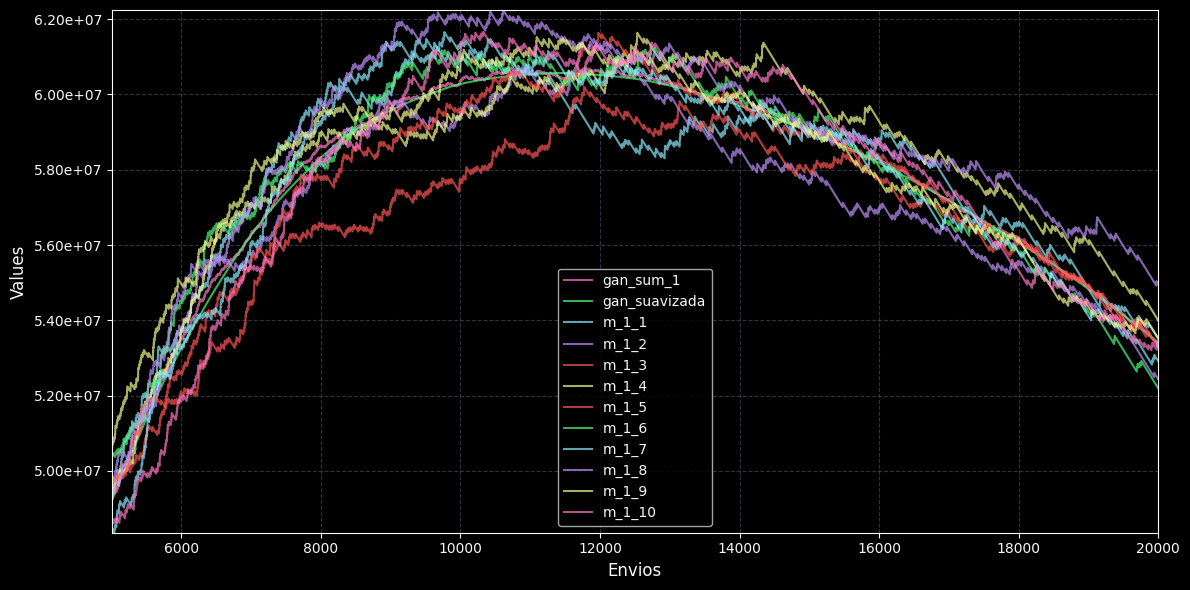

In [47]:
ninguno_plot = plot_metrics(ninguno_df)
ninguno_plot

In [48]:
ninguno_peak_df = analyze_peak_values(ninguno_df)
ninguno_peak_df

,Peak Value,Peak Envios
m_1_8,6.224100e+07,10613
m_1_10,6.166200e+07,10326
m_1_7,6.165600e+07,9768
m_1_4,6.163800e+07,12534
m_1_5,6.163500e+07,11975
m_1_2,6.160200e+07,11826
m_1_9,6.152400e+07,11092
m_1_1,6.147300e+07,9509
m_1_6,6.127200e+07,12736
gan_sum_1,6.072000e+07,10720


## Rank Simple

In [49]:
rank_simple_df = pd.read_csv(rank_simple_dir, sep='\t')
rank_simple_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164596 entries, 0 to 164595
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   envios         164596 non-null  int64  
 1   gan_sum_1      164596 non-null  float64
 2   m_1_1          164596 non-null  float64
 3   m_1_2          164596 non-null  float64
 4   m_1_3          164596 non-null  float64
 5   m_1_4          164596 non-null  float64
 6   m_1_5          164596 non-null  float64
 7   m_1_6          164596 non-null  float64
 8   m_1_7          164596 non-null  float64
 9   m_1_8          164596 non-null  float64
 10  m_1_9          164596 non-null  float64
 11  m_1_10         164596 non-null  float64
 12  gan_suavizada  162596 non-null  float64
dtypes: float64(12), int64(1)
memory usage: 16.3 MB


In [50]:
rank_simple_df.describe()

,envios,gan_sum_1,m_1_1,m_1_2,m_1_3,m_1_4,m_1_5,m_1_6,m_1_7,m_1_8,m_1_9,m_1_10,gan_suavizada
count,164596.000000,1.645960e+05,1.645960e+05,1.645960e+05,1.645960e+05,1.645960e+05,1.645960e+05,1.645960e+05,1.645960e+05,1.645960e+05,1.645960e+05,1.645960e+05,1.625960e+05
mean,82298.500000,-1.114587e+08,-1.114096e+08,-1.115245e+08,-1.113850e+08,-1.115399e+08,-1.114194e+08,-1.113885e+08,-1.114508e+08,-1.115974e+08,-1.114287e+08,-1.114430e+08,-1.107773e+08
std,47514.916791,1.261787e+08,1.262223e+08,1.261496e+08,1.261923e+08,1.262130e+08,1.262214e+08,1.261521e+08,1.261248e+08,1.261263e+08,1.262398e+08,1.261493e+08,1.252913e+08
min,1.000000,-3.440280e+08,-3.440280e+08,-3.440280e+08,-3.440280e+08,-3.440280e+08,-3.440280e+08,-3.440280e+08,-3.440280e+08,-3.440280e+08,-3.440280e+08,-3.440280e+08,-3.410280e+08
25%,41149.750000,-2.212418e+08,-2.211818e+08,-2.213018e+08,-2.211818e+08,-2.213018e+08,-2.213018e+08,-2.211818e+08,-2.213018e+08,-2.213018e+08,-2.211818e+08,-2.211818e+08,-2.197539e+08
50%,82298.500000,-1.022955e+08,-1.025355e+08,-1.026555e+08,-1.018155e+08,-1.024155e+08,-1.020555e+08,-1.019355e+08,-1.020555e+08,-1.025355e+08,-1.026555e+08,-1.022955e+08,-1.023095e+08
75%,123447.250000,9.666750e+06,9.363750e+06,9.270750e+06,9.552750e+06,9.789750e+06,9.819000e+06,9.906000e+06,1.000275e+07,9.618750e+06,9.807750e+06,9.474750e+06,1.029499e+07
max,164596.000000,6.101100e+07,6.163500e+07,6.137400e+07,6.120300e+07,6.099000e+07,6.187500e+07,6.114600e+07,6.111600e+07,6.131100e+07,6.245400e+07,6.135000e+07,6.075448e+07


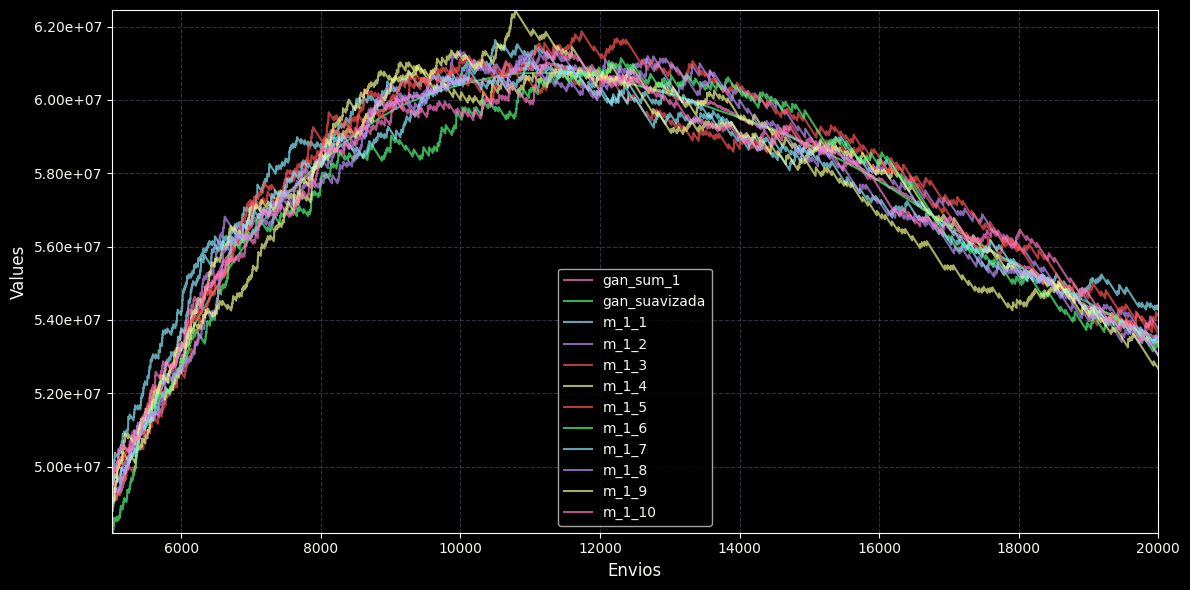

In [51]:
rank_simple_plot = plot_metrics(rank_simple_df)
rank_simple_plot

In [52]:
rank_simple_peak_df = analyze_peak_values(rank_simple_df)
rank_simple_peak_df

,Peak Value,Peak Envios
m_1_9,6.245400e+07,10782
m_1_5,6.187500e+07,11735
m_1_1,6.163500e+07,10495
m_1_2,6.137400e+07,11342
m_1_10,6.135000e+07,11390
m_1_8,6.131100e+07,10963
m_1_3,6.120300e+07,10119
m_1_6,6.114600e+07,12298
m_1_7,6.111600e+07,10988
gan_sum_1,6.101100e+07,11243


## Rank Zero Fijo

In [53]:
rank_cero_fijo_df = pd.read_csv(rank_cero_fijo_dir, sep='\t')
rank_cero_fijo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164596 entries, 0 to 164595
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   envios         164596 non-null  int64  
 1   gan_sum_1      164596 non-null  float64
 2   m_1_1          164596 non-null  float64
 3   m_1_2          164596 non-null  float64
 4   m_1_3          164596 non-null  float64
 5   m_1_4          164596 non-null  float64
 6   m_1_5          164596 non-null  float64
 7   m_1_6          164596 non-null  float64
 8   m_1_7          164596 non-null  float64
 9   m_1_8          164596 non-null  float64
 10  m_1_9          164596 non-null  float64
 11  m_1_10         164596 non-null  float64
 12  gan_suavizada  162596 non-null  float64
dtypes: float64(12), int64(1)
memory usage: 16.3 MB


In [54]:
rank_cero_fijo_df.describe()

,envios,gan_sum_1,m_1_1,m_1_2,m_1_3,m_1_4,m_1_5,m_1_6,m_1_7,m_1_8,m_1_9,m_1_10,gan_suavizada
count,164596.000000,1.645960e+05,1.645960e+05,1.645960e+05,1.645960e+05,1.645960e+05,1.645960e+05,1.645960e+05,1.645960e+05,1.645960e+05,1.645960e+05,1.645960e+05,1.625960e+05
mean,82298.500000,-1.123744e+08,-1.127849e+08,-1.126228e+08,-1.122892e+08,-1.123965e+08,-1.119451e+08,-1.125891e+08,-1.124211e+08,-1.119799e+08,-1.126005e+08,-1.121147e+08,-1.117050e+08
std,47514.916791,1.253165e+08,1.249456e+08,1.252073e+08,1.255700e+08,1.251021e+08,1.256323e+08,1.252167e+08,1.253232e+08,1.256234e+08,1.250374e+08,1.255236e+08,1.244174e+08
min,1.000000,-3.440280e+08,-3.440280e+08,-3.440280e+08,-3.440280e+08,-3.440280e+08,-3.440280e+08,-3.440280e+08,-3.440280e+08,-3.440280e+08,-3.440280e+08,-3.440280e+08,-3.410408e+08
25%,41149.750000,-2.219018e+08,-2.219018e+08,-2.223818e+08,-2.219018e+08,-2.217818e+08,-2.216618e+08,-2.219018e+08,-2.221418e+08,-2.217818e+08,-2.218320e+08,-2.218088e+08,-2.204325e+08
50%,82298.500000,-1.017075e+08,-1.019355e+08,-1.021755e+08,-1.018170e+08,-1.009755e+08,-1.018155e+08,-1.019355e+08,-1.016565e+08,-1.014555e+08,-1.019355e+08,-1.013355e+08,-1.017032e+08
75%,123447.250000,8.148000e+06,7.302750e+06,8.796750e+06,7.476750e+06,7.602750e+06,8.355000e+06,8.832750e+06,7.551750e+06,8.988750e+06,8.061750e+06,8.358750e+06,8.429365e+06
max,164596.000000,5.671800e+07,5.620500e+07,5.556600e+07,5.858400e+07,5.831700e+07,5.977800e+07,5.526300e+07,5.772000e+07,5.788500e+07,5.527800e+07,5.921400e+07,5.660183e+07


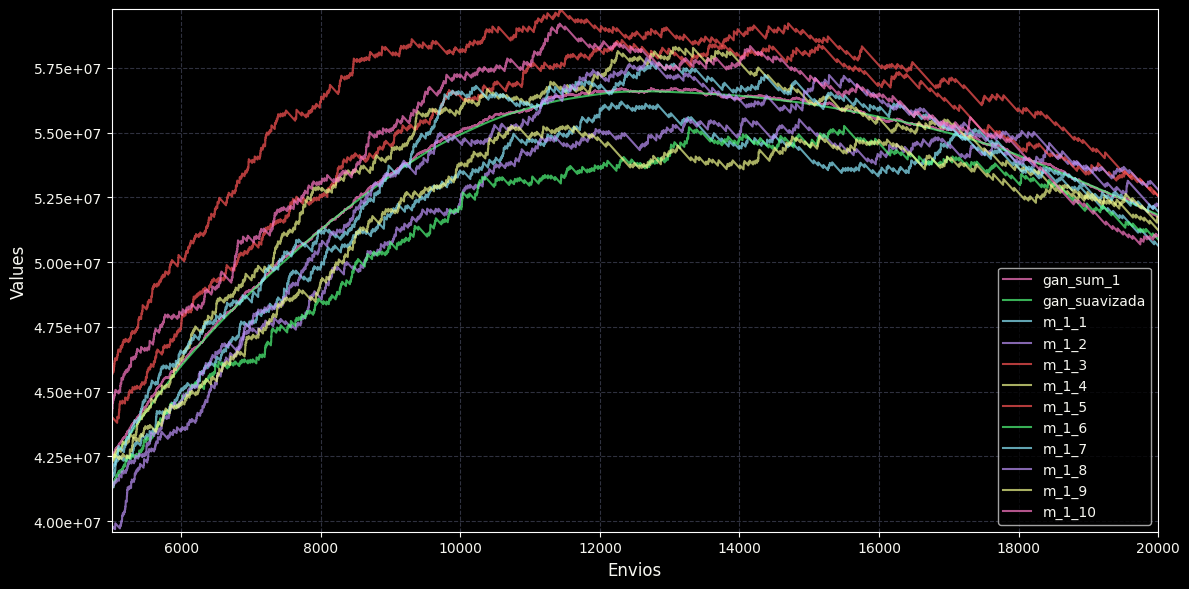

In [55]:
rank_cero_fijo_plot = plot_metrics(rank_cero_fijo_df)
rank_cero_fijo_plot

In [56]:
rank_cero_fijo_peak_df = analyze_peak_values(rank_cero_fijo_df)
rank_cero_fijo_peak_df

,Peak Value,Peak Envios
m_1_5,5.977800e+07,11434
m_1_10,5.921400e+07,11422
m_1_3,5.858400e+07,12312
m_1_4,5.831700e+07,13081
m_1_8,5.788500e+07,12665
m_1_7,5.772000e+07,12840
gan_sum_1,5.671800e+07,12734
gan_suavizada,5.660183e+07,12707
m_1_1,5.620500e+07,12305
m_1_2,5.556600e+07,13238


## Deflacion

In [57]:
deflacion_df = pd.read_csv(deflacion_dir, sep='\t')
deflacion_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164596 entries, 0 to 164595
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   envios         164596 non-null  int64  
 1   gan_sum_1      164596 non-null  float64
 2   m_1_1          164596 non-null  float64
 3   m_1_2          164596 non-null  float64
 4   m_1_3          164596 non-null  float64
 5   m_1_4          164596 non-null  float64
 6   m_1_5          164596 non-null  float64
 7   m_1_6          164596 non-null  float64
 8   m_1_7          164596 non-null  float64
 9   m_1_8          164596 non-null  float64
 10  m_1_9          164596 non-null  float64
 11  m_1_10         164596 non-null  float64
 12  gan_suavizada  162596 non-null  float64
dtypes: float64(12), int64(1)
memory usage: 16.3 MB


In [58]:
deflacion_df.describe()

,envios,gan_sum_1,m_1_1,m_1_2,m_1_3,m_1_4,m_1_5,m_1_6,m_1_7,m_1_8,m_1_9,m_1_10,gan_suavizada
count,164596.000000,1.645960e+05,1.645960e+05,1.645960e+05,1.645960e+05,1.645960e+05,1.645960e+05,1.645960e+05,1.645960e+05,1.645960e+05,1.645960e+05,1.645960e+05,1.625960e+05
mean,82298.500000,-1.111140e+08,-1.111390e+08,-1.110965e+08,-1.110702e+08,-1.112920e+08,-1.112275e+08,-1.111127e+08,-1.109351e+08,-1.110705e+08,-1.112591e+08,-1.109374e+08,-1.104289e+08
std,47514.916791,1.263760e+08,1.263813e+08,1.263554e+08,1.264632e+08,1.263004e+08,1.262834e+08,1.263502e+08,1.264986e+08,1.264124e+08,1.263804e+08,1.263401e+08,1.254901e+08
min,1.000000,-3.440280e+08,-3.440280e+08,-3.440280e+08,-3.440280e+08,-3.440280e+08,-3.440280e+08,-3.440280e+08,-3.440280e+08,-3.440280e+08,-3.440280e+08,-3.440280e+08,-3.410431e+08
25%,41149.750000,-2.216138e+08,-2.215418e+08,-2.216618e+08,-2.214218e+08,-2.220218e+08,-2.217818e+08,-2.215418e+08,-2.214218e+08,-2.215418e+08,-2.219018e+08,-2.213018e+08,-2.201524e+08
50%,82298.500000,-1.009035e+08,-1.010955e+08,-1.009755e+08,-1.004955e+08,-1.013025e+08,-1.003755e+08,-1.012155e+08,-1.013355e+08,-1.006155e+08,-1.010955e+08,-1.004955e+08,-1.008774e+08
75%,123447.250000,1.035975e+07,1.076175e+07,9.759750e+06,1.029375e+07,1.047300e+07,1.029000e+07,1.010175e+07,1.071375e+07,1.058175e+07,1.045575e+07,1.013475e+07,1.115689e+07
max,164596.000000,6.031500e+07,6.151500e+07,5.937600e+07,6.220500e+07,6.048300e+07,5.989500e+07,6.125100e+07,6.081000e+07,6.126600e+07,6.090600e+07,6.010200e+07,6.013637e+07


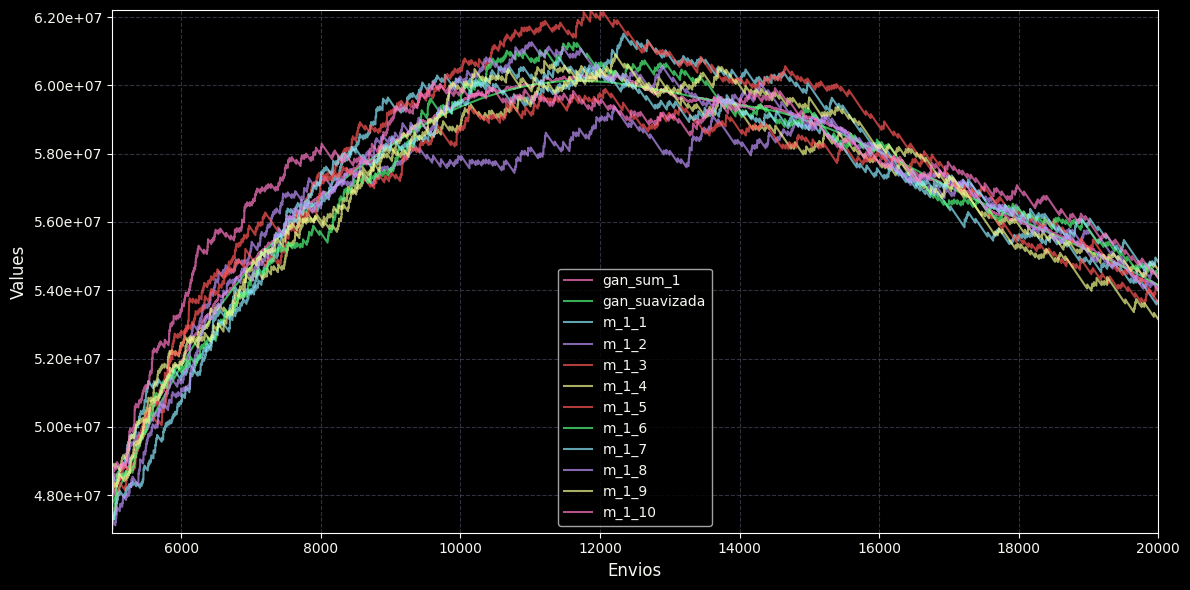

In [59]:
deflacion_plot = plot_metrics(deflacion_df)
deflacion_plot

In [60]:
deflacion_peak_df = analyze_peak_values(deflacion_df)
deflacion_peak_df

,Peak Value,Peak Envios
m_1_3,6.220500e+07,11865
m_1_1,6.151500e+07,12335
m_1_8,6.126600e+07,11018
m_1_6,6.125100e+07,11623
m_1_9,6.090600e+07,12218
m_1_7,6.081000e+07,11410
m_1_4,6.048300e+07,11999
gan_sum_1,6.031500e+07,12007
gan_suavizada,6.013637e+07,11652
m_1_10,6.010200e+07,9606


## UVA

In [61]:
uva_df = pd.read_csv(uva_dir, sep='\t')
uva_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164596 entries, 0 to 164595
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   envios         164596 non-null  int64  
 1   gan_sum_1      164596 non-null  float64
 2   m_1_1          164596 non-null  float64
 3   m_1_2          164596 non-null  float64
 4   m_1_3          164596 non-null  float64
 5   m_1_4          164596 non-null  float64
 6   m_1_5          164596 non-null  float64
 7   m_1_6          164596 non-null  float64
 8   m_1_7          164596 non-null  float64
 9   m_1_8          164596 non-null  float64
 10  m_1_9          164596 non-null  float64
 11  m_1_10         164596 non-null  float64
 12  gan_suavizada  162596 non-null  float64
dtypes: float64(12), int64(1)
memory usage: 16.3 MB


In [62]:
uva_df.describe()

,envios,gan_sum_1,m_1_1,m_1_2,m_1_3,m_1_4,m_1_5,m_1_6,m_1_7,m_1_8,m_1_9,m_1_10,gan_suavizada
count,164596.000000,1.645960e+05,1.645960e+05,1.645960e+05,1.645960e+05,1.645960e+05,1.645960e+05,1.645960e+05,1.645960e+05,1.645960e+05,1.645960e+05,1.645960e+05,1.625960e+05
mean,82298.500000,-1.108307e+08,-1.109062e+08,-1.108549e+08,-1.109428e+08,-1.107439e+08,-1.108200e+08,-1.108704e+08,-1.108311e+08,-1.108008e+08,-1.108228e+08,-1.107137e+08,-1.101427e+08
std,47514.916791,1.265511e+08,1.265555e+08,1.265482e+08,1.264083e+08,1.267011e+08,1.265411e+08,1.264722e+08,1.266084e+08,1.265364e+08,1.265054e+08,1.266381e+08,1.256657e+08
min,1.000000,-3.440280e+08,-3.440280e+08,-3.440280e+08,-3.440280e+08,-3.440280e+08,-3.440400e+08,-3.440280e+08,-3.440280e+08,-3.440280e+08,-3.440280e+08,-3.440280e+08,-3.410723e+08
25%,41149.750000,-2.215178e+08,-2.217818e+08,-2.216618e+08,-2.215418e+08,-2.216618e+08,-2.214218e+08,-2.215418e+08,-2.213018e+08,-2.214218e+08,-2.214218e+08,-2.214218e+08,-2.200419e+08
50%,82298.500000,-1.005795e+08,-1.009755e+08,-1.007355e+08,-1.008555e+08,-1.004955e+08,-1.004955e+08,-1.003755e+08,-1.006155e+08,-1.006155e+08,-9.989550e+07,-1.007355e+08,-1.005599e+08
75%,123447.250000,1.095300e+07,1.093875e+07,1.085475e+07,1.045200e+07,1.067475e+07,1.110600e+07,1.105200e+07,1.098375e+07,1.103475e+07,1.129875e+07,1.130700e+07,1.182433e+07
max,164596.000000,6.076800e+07,6.143100e+07,6.171000e+07,6.115800e+07,6.192300e+07,6.103800e+07,6.055800e+07,6.142800e+07,6.085800e+07,6.129000e+07,6.096600e+07,6.053806e+07


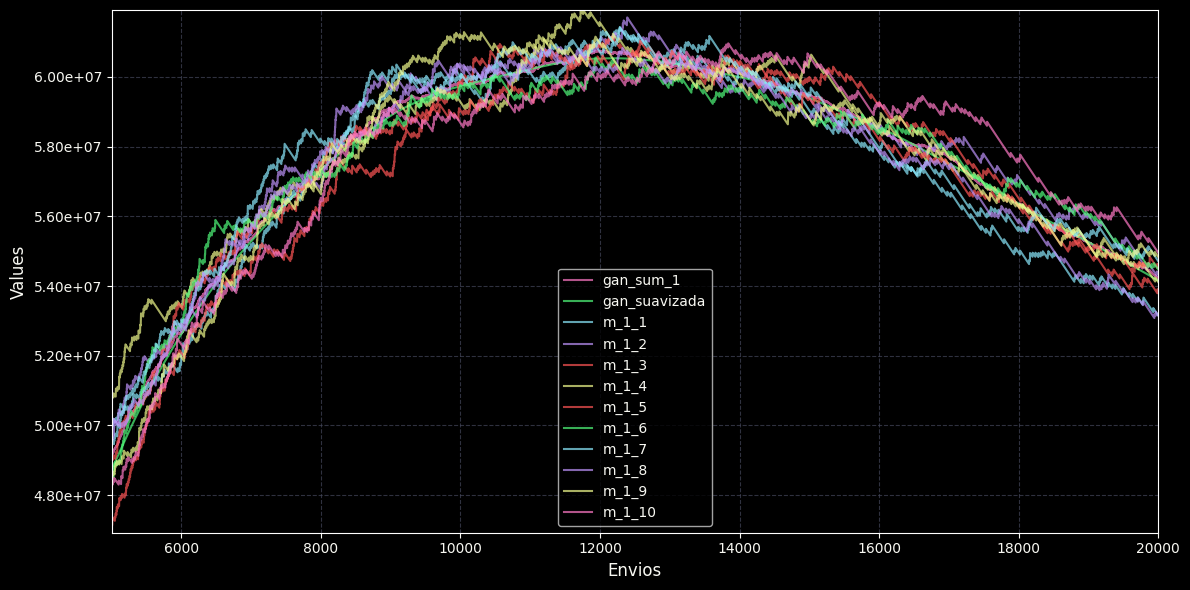

In [63]:
uva_plot = plot_metrics(uva_df)
uva_plot

In [64]:
uva_peak_df = analyze_peak_values(uva_df)
uva_df

,envios,gan_sum_1,m_1_1,m_1_2,m_1_3,m_1_4,m_1_5,m_1_6,m_1_7,m_1_8,m_1_9,m_1_10,gan_suavizada
0,1,-3000.0,-3000.0,-3000.0,-3000.0,-3000.0,-3000.0,-3000.0,-3000.0,-3000.0,-3000.0,-3000.0,NaN
1,2,-6000.0,-6000.0,-6000.0,-6000.0,-6000.0,-6000.0,-6000.0,-6000.0,-6000.0,-6000.0,-6000.0,NaN
2,3,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,NaN
3,4,-12000.0,-12000.0,-12000.0,-12000.0,-12000.0,-12000.0,-12000.0,-12000.0,-12000.0,-12000.0,-12000.0,NaN
4,5,-3000.0,-15000.0,-15000.0,-15000.0,-15000.0,-15000.0,-15000.0,-15000.0,-15000.0,-15000.0,105000.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
164591,164592,-344016000.0,-344016000.0,-344016000.0,-344016000.0,-344016000.0,-344016000.0,-344016000.0,-344016000.0,-344016000.0,-344016000.0,-344016000.0,NaN
164592,164593,-344019000.0,-344019000.0,-344019000.0,-344019000.0,-344019000.0,-344019000.0,-344019000.0,-344019000.0,-344019000.0,-344019000.0,-344019000.0,NaN
164593,164594,-344022000.0,-344022000.0,-344022000.0,-344022000.0,-344022000.0,-344022000.0,-344022000.0,-344022000.0,-344022000.0,-344022000.0,-344022000.0,NaN
164594,164595,-344025000.0,-344025000.0,-344025000.0,-344025000.0,-344025000.0,-344025000.0,-344025000.0,-344025000.0,-344025000.0,-344025000.0,-344025000.0,NaN


## Wilcoxon

In [65]:
def wilcoxon_test(df1, df2, column='gan_suavizada', envios_range=(8000, 20000)):
    """Perform Wilcoxon signed-rank test between two DataFrames within specified envios range."""
    df1_filtered = df1[(df1['envios'] >= envios_range[0]) & (df1['envios'] <= envios_range[1])]
    df2_filtered = df2[(df2['envios'] >= envios_range[0]) & (df2['envios'] <= envios_range[1])]
    
    merged = pd.merge(df1_filtered[['envios', column]], df2_filtered[['envios', column]], on='envios', suffixes=('_1', '_2'))
    
    statistic, p_value = stats.wilcoxon(merged[f'{column}_1'], merged[f'{column}_2'])
    return statistic, p_value

In [66]:
def compare_dataframes(dataframes, alpha=0.05, envios_range=(5000, 13000)):
    """Compare all pairs of DataFrames using Wilcoxon test within specified envios range."""
    results = []
    for (name1, df1), (name2, df2) in combinations(dataframes.items(), 2):
        statistic, p_value = wilcoxon_test(df1, df2, envios_range=envios_range)
        better = name1 if statistic > 0 else name2
        significant = p_value < alpha
        results.append({
            'df1': name1,
            'df2': name2,
            'statistic': statistic,
            'p_value': p_value,
            'better': better if significant else 'No significant difference',
            'significant': significant
        })
    return pd.DataFrame(results)

In [67]:
dataframes = {
    'ninguno': ninguno_df,
    'rank_simple_df': rank_simple_df,
    'rank_cero_fijo': rank_cero_fijo_df,
    'deflacion': deflacion_df,
    # 'dolar_blue': dolar_blue_df,
    # 'dolar_oficial': dolar_oficial_df,
    'uva': uva_df            
    # 'estandarizar': estandarizar_df,
}

In [68]:
comparison_results = compare_dataframes(dataframes)
comparison_results

,df1,df2,statistic,p_value,better,significant
0,ninguno,rank_simple_df,9539275.0,4.952935e-215,ninguno,True
1,ninguno,rank_cero_fijo,0.0,0.000000e+00,rank_cero_fijo,True
2,ninguno,deflacion,0.0,0.000000e+00,deflacion,True
3,ninguno,uva,899154.5,0.000000e+00,ninguno,True
4,rank_simple_df,rank_cero_fijo,0.0,0.000000e+00,rank_cero_fijo,True
5,rank_simple_df,deflacion,0.0,0.000000e+00,deflacion,True
6,rank_simple_df,uva,572354.5,0.000000e+00,rank_simple_df,True
7,rank_cero_fijo,deflacion,0.0,0.000000e+00,deflacion,True
8,rank_cero_fijo,uva,0.0,0.000000e+00,uva,True
9,deflacion,uva,0.0,0.000000e+00,uva,True


In [69]:
win_counts = comparison_results[comparison_results['significant']]['better'].value_counts()
win_counts

better
deflacion         3
ninguno           2
rank_cero_fijo    2
uva               2
rank_simple_df    1
Name: count, dtype: int64

In [70]:
best_df = win_counts.index[0] if not win_counts.empty else "No clear winner"
best_df

'deflacion'

In [71]:
if best_df != "No clear winner":
    print(f"\nPairwise comparisons for {best_df}:")
    best_df_comparisons = comparison_results[
        (comparison_results['df1'] == best_df) | (comparison_results['df2'] == best_df)
    ]
    print(best_df_comparisons[['df1', 'df2', 'better', 'p_value']])


Pairwise comparisons for deflacion:
              df1        df2     better  p_value
2         ninguno  deflacion  deflacion      0.0
5  rank_simple_df  deflacion  deflacion      0.0
7  rank_cero_fijo  deflacion  deflacion      0.0
9       deflacion        uva        uva      0.0
